# Exploratory Data Analysis

## Goal
1. Investigate top-paying roles and skills in the data science field
2. Use Python to explore a real-live dataset on job postings
3. Extract insights on job trends 

### Final Deliverables
- Create Jupyter Notebooks
- Summary page in readme.md to capture findings
- Share project via github

In [2]:
# Import Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Initial data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Filter for US and MY Data Analyst Roles

In [3]:
df_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]
df_my = df[(df['job_country'] == 'Malaysia') & (df['job_title_short'] == 'Data Analyst')]

In [9]:
# Exploring the data for locations
df_usplot = df_us['job_location'].value_counts().head(10).to_frame()

In [10]:
df_myplot = df_my['job_location'].value_counts().head(10).to_frame()

Text(0, 0.5, '')

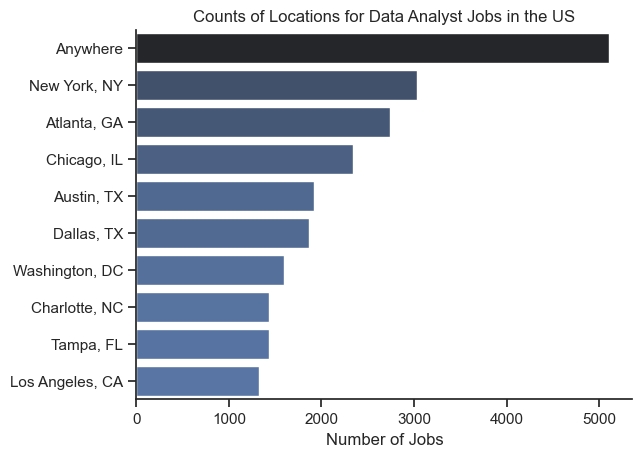

In [20]:
# Plotting US job location
sns.set_theme(style='ticks')
sns.barplot(df_usplot, x = 'count', y ='job_location', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine() # remove border
plt.title('Counts of Locations for Data Analyst Jobs in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')

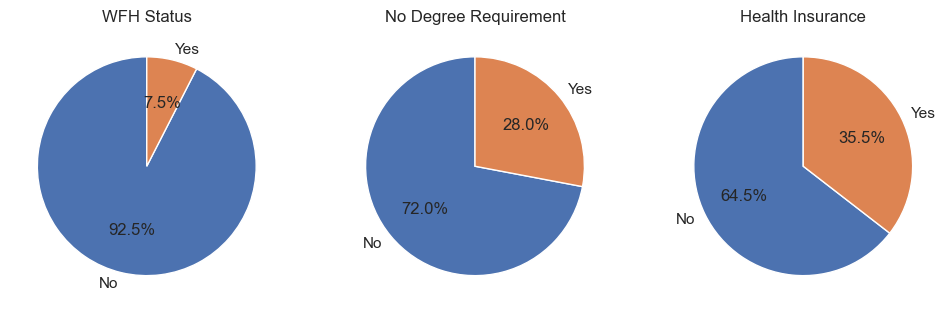

In [50]:
# Benefit Analysis: WFH, degree requirement & health insurance
fig, ax = plt.subplots(1, 3, figsize = (12,5))

dict_column = {
    'job_work_from_home':'WFH Status',
    'job_no_degree_mention':'No Degree Requirement',
    'job_health_insurance':'Health Insurance'
}

for i, (column, title) in enumerate (dict_column.items()):
    ax[i].pie(df_us[column].value_counts(), startangle = 90, labels = ('No', 'Yes'), autopct = '%1.1f%%')
    ax[i].set_title(title)

Text(0, 0.5, '')

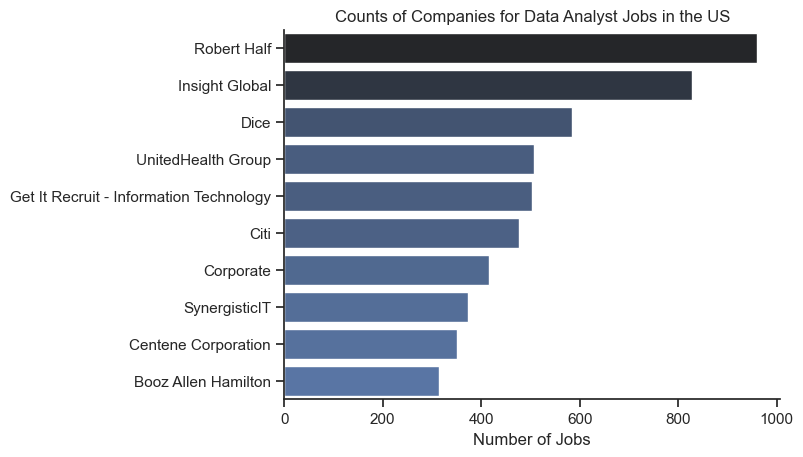

In [39]:
df_usplot_company = df_us['company_name'].value_counts().head(10).to_frame()

# Plotting US job companies for data analyst
sns.set_theme(style='ticks')
sns.barplot(df_usplot_company, x = 'count', y ='company_name', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine() # remove border
plt.title('Counts of Companies for Data Analyst Jobs in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')

Exploring the MY data

Text(0, 0.5, '')

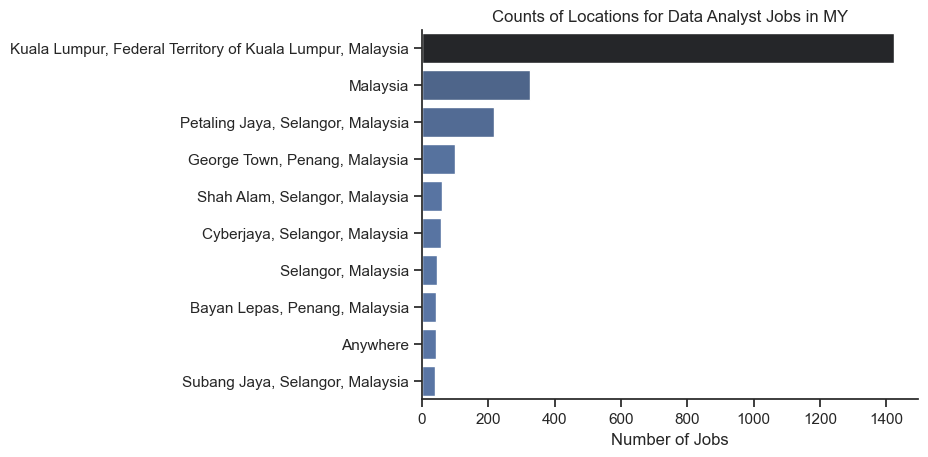

In [40]:
df_myplot
# Plotting MY job location
sns.set_theme(style='ticks')
sns.barplot(df_myplot, x = 'count', y ='job_location', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine() # remove border
plt.title('Counts of Locations for Data Analyst Jobs in MY')
plt.xlabel('Number of Jobs')
plt.ylabel('')

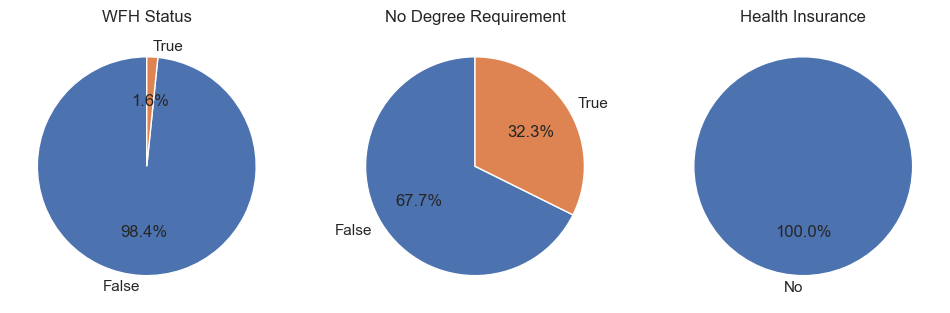

In [49]:
# Benefit Analysis: WFH, degree requirement & health insurance
fig, ax = plt.subplots(1, 3, figsize = (12,5))

dict_column = {
    'job_work_from_home':'WFH Status',
    'job_no_degree_mention':'No Degree Requirement',
    'job_health_insurance':'Health Insurance'
}

for i, (column, title) in enumerate (dict_column.items()):
    # Get value counts and unique labels
    value_counts = df_my[column].value_counts()
    labels = value_counts.index  # Get the actual labels present in the data (True False)

    # Handle case where there's only one unique value (Health Insurance are all False)
    if len(labels) == 1: # Check if there is only one unique value in the column, like only False
        if labels[0]:  # The first item/value, what is the value? True or False?
            labels = ['Yes']
        else:  # If the only value is False
            labels = ['No']

    # Create pie chart
    ax[i].pie(df_my[column].value_counts(), startangle = 90, labels = labels, autopct = '%1.1f%%')
    ax[i].set_title(title)

In [47]:
df_my['job_health_insurance'].value_counts()

job_health_insurance
False    2527
Name: count, dtype: int64

Text(0, 0.5, '')

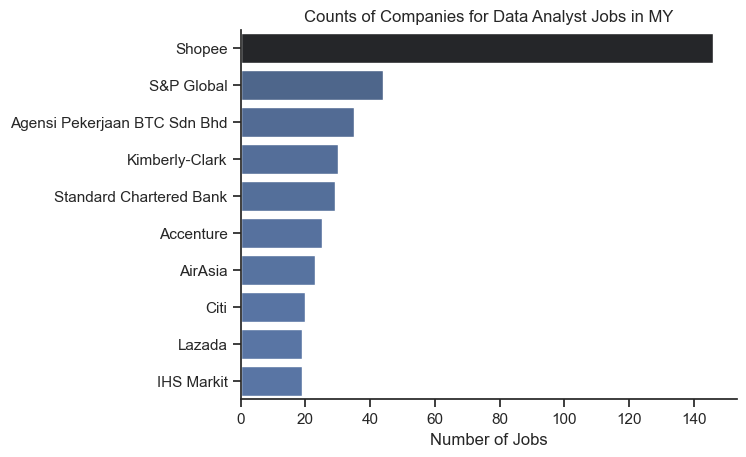

In [52]:
df_myplot_company = df_my['company_name'].value_counts().head(10).to_frame()

# Plotting MY job companies for data analyst
sns.set_theme(style='ticks')
sns.barplot(df_myplot_company, x = 'count', y ='company_name', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine() # remove border
plt.title('Counts of Companies for Data Analyst Jobs in MY')
plt.xlabel('Number of Jobs')
plt.ylabel('')